In [ ]:
The K-Means Clustering algorithm on the RGB values and find clusters of different set of colors present in the image. After that, again make use of frequency count and finally find the background color. 
This method involves the use of unsupervised machine learning and it's applications extend much beyond background color detection. Image segmentation tasks make heavy use of this approach of using K-Means Clustering on the image.

In [38]:
import cv2
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

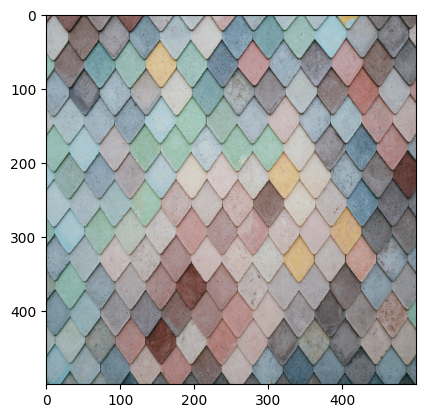

In [42]:
img=cv2.imread('/Users/mohammadadnaan/Desktop/Background-Color-Detection-main/picture2.jpg')
img=cv2.resize(img,(500,500))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
#Reshaping to make 2D matrix of all the points.

modified_img=img.reshape(img.shape[0]*img.shape[1],3)
print(modified_img)

[[134 132 168]
 [137 135 171]
 [140 138 172]
 ...
 [ 35  33  15]
 [ 68  66  46]
 [117 113 102]]


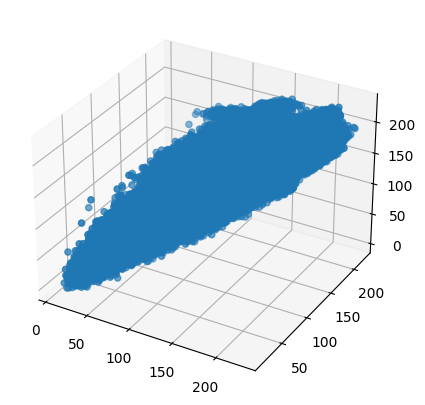

In [44]:
#plotting all the points in 3D space.

x=modified_img[:,0]
y=modified_img[:,1]
z=modified_img[:,2]
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z)
plt.show()

In [45]:
# Performing unpsupervised learning using K-Means

kmean=KMeans(n_clusters=10)
labels=kmean.fit_predict(modified_img)
#print(kmean.labels_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


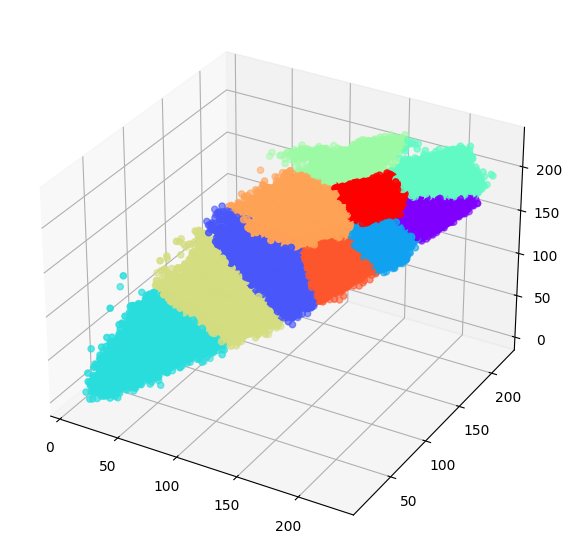

In [46]:
#Points as shown according to the labels of KMeans

x=modified_img[:,0]
y=modified_img[:,1]
z=modified_img[:,2]
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, c=kmean.labels_, cmap='rainbow')
ax.scatter(kmean.cluster_centers_[:,0] ,kmean.cluster_centers_[:,1],kmean.cluster_centers_[:,2], color='black')
plt.show()

In [47]:
#Making frequency of each label set i.e count of no. of data-points in each label

count=Counter(labels)
count

Counter({0: 40721,
         2: 34920,
         4: 33554,
         9: 31758,
         8: 28895,
         1: 27591,
         7: 23489,
         6: 15480,
         3: 7805,
         5: 5787})

In [48]:
#centroids of the clusters

center_color=kmean.cluster_centers_
center_color

array([[189.18045537, 187.6599686 , 164.65817754],
       [112.81403598, 112.88497593, 118.17557639],
       [168.50593247, 163.75878434, 143.0277611 ],
       [ 50.38763178,  54.44870147,  58.80984829],
       [190.6432397 , 192.77728517, 196.91002142],
       [139.77125086, 182.36005529, 209.11281963],
       [ 84.28657666,  87.21225497,  95.8386343 ],
       [131.10681847, 135.56398448, 164.94848834],
       [144.09705607, 137.66853913, 125.9896321 ],
       [164.04618145, 165.22857772, 180.00100737]])

In [49]:
ordered_color=[center_color[i] for i in count.keys()]
ordered_color

[array([131.10681847, 135.56398448, 164.94848834]),
 array([50.38763178, 54.44870147, 58.80984829]),
 array([84.28657666, 87.21225497, 95.8386343 ]),
 array([112.81403598, 112.88497593, 118.17557639]),
 array([144.09705607, 137.66853913, 125.9896321 ]),
 array([168.50593247, 163.75878434, 143.0277611 ]),
 array([164.04618145, 165.22857772, 180.00100737]),
 array([189.18045537, 187.6599686 , 164.65817754]),
 array([190.6432397 , 192.77728517, 196.91002142]),
 array([139.77125086, 182.36005529, 209.11281963])]

In [50]:
def rgb2hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [51]:
hex_color=[rgb2hex(ordered_color[i]) for i in count.keys()]
hex_color

['#bdbba4',
 '#707076',
 '#a4a5b4',
 '#32363a',
 '#bec0c4',
 '#54575f',
 '#8bb6d1',
 '#8387a4',
 '#90897d',
 '#a8a38f']

([<matplotlib.patches.Wedge at 0x2a38d0fd0>,
 [Text(1.052427498498425, 0.3199943130812608, '#bdbba4'),
  Text(0.8494734204027486, 0.6988525653020493, '#707076'),
  Text(0.6117822208719365, 0.9141786008351986, '#a4a5b4'),
  Text(0.05334970591423085, 1.098705515085305, '#32363a'),
  Text(-0.6755622014312127, 0.8681104261540773, '#bec0c4'),
  Text(-1.0936421346040763, 0.11809691536462481, '#54575f'),
  Text(-0.8194480449632678, -0.7338289321128448, '#8bb6d1'),
  Text(0.0773035379693037, -1.0972803484148563, '#8387a4'),
  Text(0.9278114063612156, -0.590902694380406, '#90897d'),
  Text(1.0970926380254185, -0.0799233607303159, '#a8a38f')])

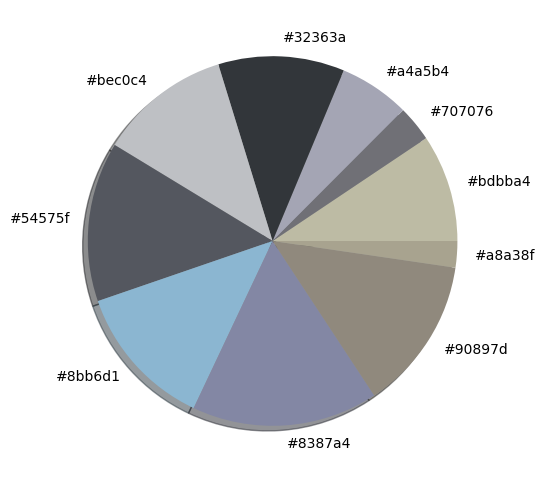

In [52]:
plt.figure(figsize = (8, 6))
plt.pie(count.values(),labels=hex_color,colors=hex_color,shadow=True)

In [53]:
def get_key(val):
    for key,value in count.items():
         if val==value:
            return key
 
    return "key doesn't exist"

In [54]:
# Getting the max. color as our background

label_background=get_key(max(count.values()))
background_color=ordered_color[label_background]
hex_color_background=rgb2hex(background_color)
hex_color_background

'#8387a4'

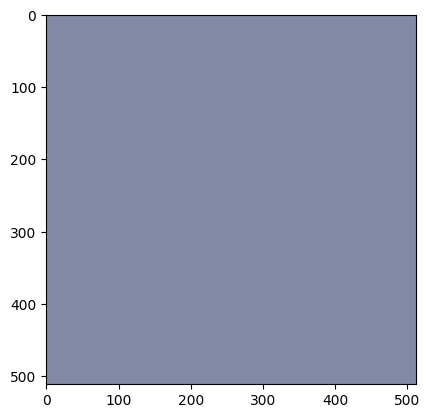

In [55]:
#showing our background in the form of an image.

bg=np.zeros((512,512,3),np.uint8)
bg_color=cv2.rectangle(bg,(0,0),(512,512),background_color,-1)
plt.imshow(bg_color)